# Generate Yeo Functional Connectivity
This script generates functional connectivites based on the Yeo 2011 parcellation.

In [22]:
from os import listdir, makedirs
from os.path import isfile, join, exists
import time

from nilearn import plotting, image, datasets
from nilearn.input_data import NiftiSpheresMasker, NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import numpy as np

In [3]:
aa_folder = 'BioBank_Analysis/'
saveresids_folder = 'aamod_firstlevel_modelestimate_saveresids_00001/'
python_fc_folder = 'python_yeo_fc'

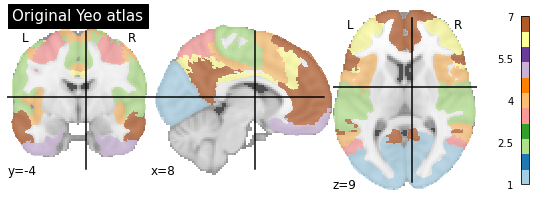

In [46]:
yeo = datasets.fetch_atlas_yeo_2011()['thick_7']

plotting.plot_roi(yeo, title='Original Yeo atlas',
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

(256, 256, 256, 1) (256, 256, 256, 1)


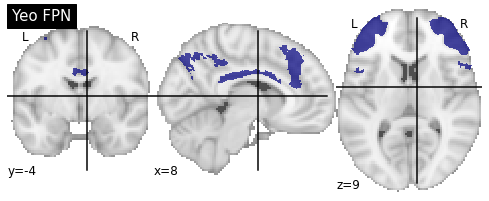

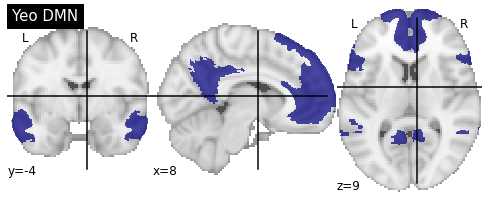

In [149]:
yeo_np = image.get_data(yeo).astype(np.int)
fpn = np.where(yeo_np == 6, yeo_np, 0)
dmn = np.where(yeo_np == 7, yeo_np, 0)
print(fpn.shape, dmn.shape)
print(np.unique(fpn, return_counts=True))
print(np.unique(dmn, return_counts=True))

yeo_fpn = image.new_img_like(yeo, fpn)
yeo_dmn = image.new_img_like(yeo, dmn)

plotting.plot_roi(yeo_fpn, title='Yeo FPN', cut_coords=(8, -4, 9))
plotting.plot_roi(yeo_dmn, title='Yeo DMN', cut_coords=(8, -4, 9))

['FPN', 'FPN', 'FPN', 'FPN', 'FPN', 'FPN', 'FPN', 'FPN', 'FPN', 'FPN', 'FPN', 'DMN', 'DMN', 'DMN', 'DMN', 'DMN', 'DMN', 'DMN', 'DMN']


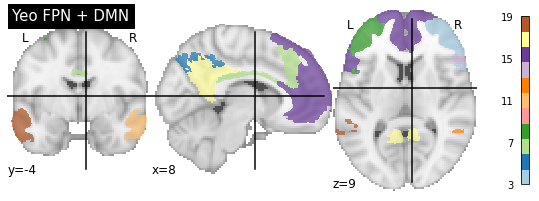

In [166]:
fpn_dmn = fpn + dmn
yeo_fpn_dmn = image.new_img_like(yeo, fpn_dmn)
new_img, new_labels = connected_label_regions(
    yeo_fpn_dmn, min_size=500, labels=["FPN", "DMN"])
print(new_labels)

plotting.plot_roi(new_img, title='Yeo FPN + DMN', 
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/nilearn/image/resampling.py:512: UserWarning: Casting data from int32 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))



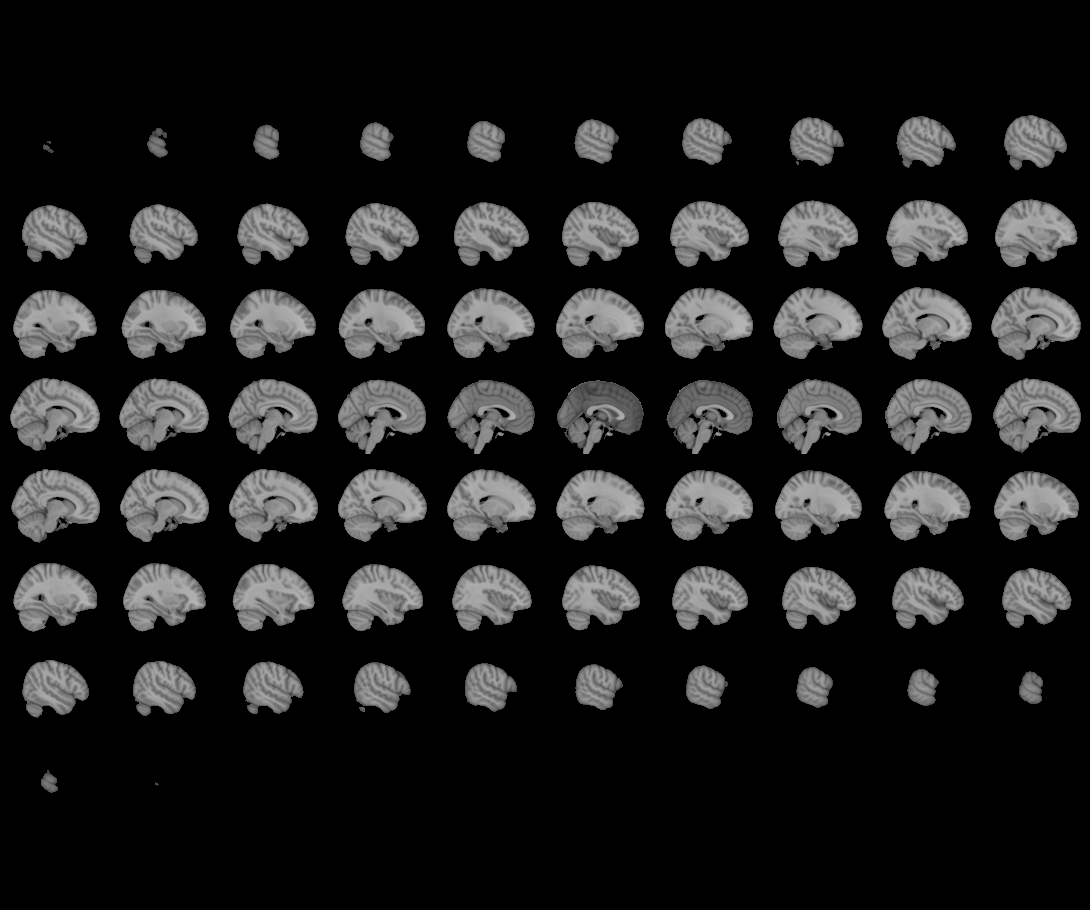
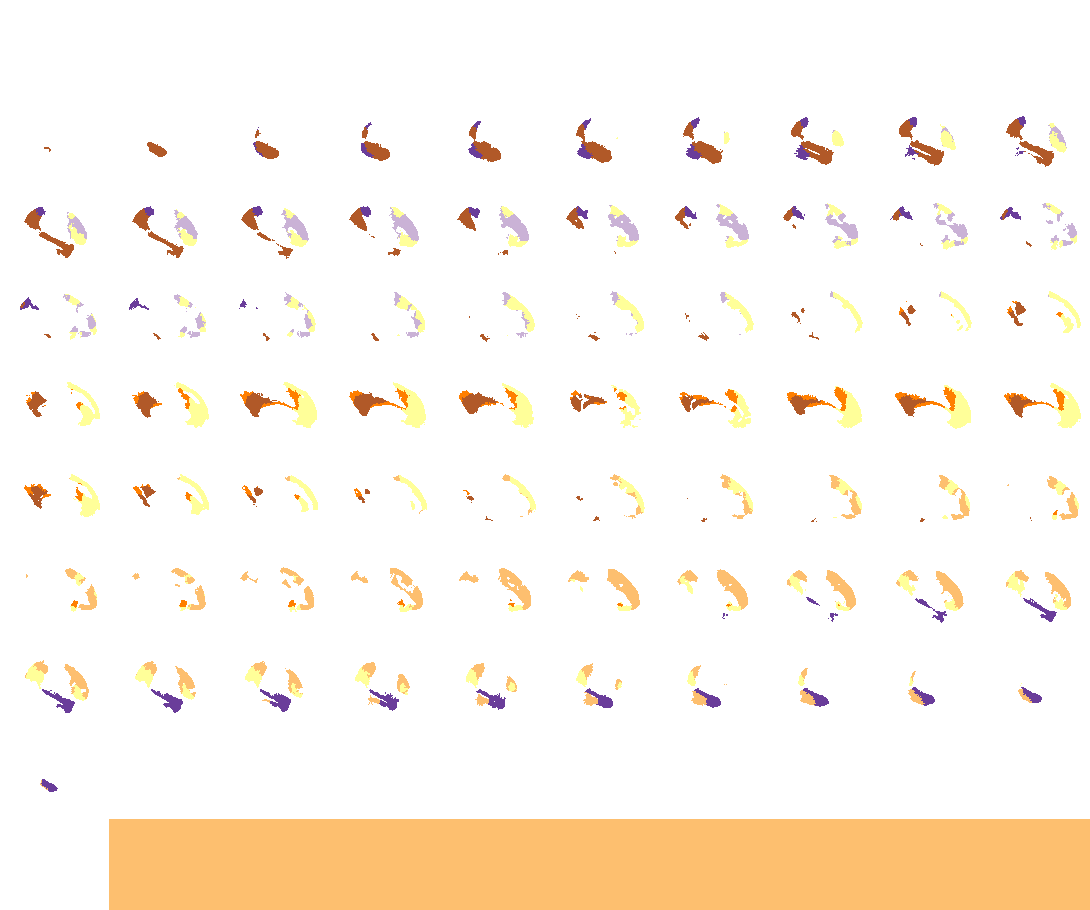

In [167]:
plotting.view_img(new_img, title='Yeo FPN + DMN', 
                  cut_coords=(8, -4, 9), colorbar=True, cmap='Paired')

In [154]:
new_img_np = image.get_data(new_img).astype(np.int)
temp = np.unique(new_img_np, return_counts=True)
print(temp)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24]), array([16380899,     6192,    14066,    55838,     1653,     7924,
          14530,       18,      233,     3567,    31776,     2942,
             55,    11090,       13,     5442,    22483,    14952,
           8879,   110620,      570,    31167,     1939,        1,
          50367]))


In [162]:
yeo_coords = plotting.find_parcellation_cut_coords(new_img)
print(yeo_coords.shape)

(20, 3)


In [164]:
yeo_labels = []
for label in new_labels:
    if label == 'FPN':
        yeo_labels.append('red')
    else:
        yeo_labels.append('green')
plotting.view_markers(yeo_coords, title='',
                      marker_color=yeo_labels, marker_size=3)

In [66]:
power = datasets.fetch_coords_power_2011()
coords = np.vstack((power.rois['x'], power.rois['y'], power.rois['z'])).T

[ 57 143 101]
[-71  15 -27]
(155339, 3)


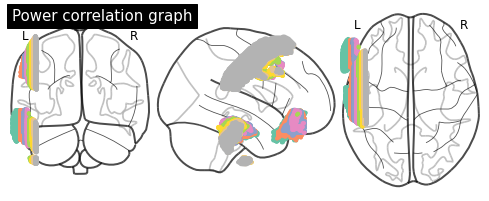

In [128]:
fpn = np.where(yeo_np == 6)
coords = np.vstack((fpn[0], fpn[1], fpn[2])).T
print(coords[0])
coords -= 128
print(coords[0])
print(coords.shape)
plotting.plot_connectome(np.zeros((30000, 30000)), coords[0:30000], title='Power correlation graph',
                         node_size=10)

[[-39.85846042  34.0926908   20.24974472]]


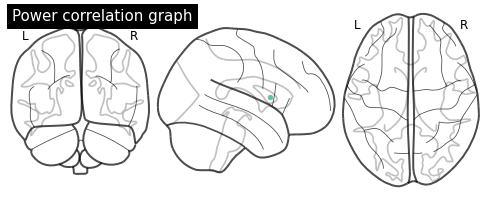

In [94]:
yeo_coords = plotting.find_parcellation_cut_coords(yeo_fpn)
print(yeo_coords)
plotting.plot_connectome(np.zeros((1, 1)), [[80, 10, 10]], title='Power correlation graph',
                         node_size=20)

(array([ 57,  57,  57, ..., 194, 194, 194]), array([143, 144, 145, ..., 157, 163, 164]), array([101, 101, 100, ...,  96, 102, 104]), array([0, 0, 0, ..., 0, 0, 0]))
(155339, 3)
[ 57 144 101]
